# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석(초창기)과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state = 1,
                             remove = ('headers', 'footers', 'quotes'))
documents = dataset.data

print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]' # regular expression
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])
    # 불용어에 해당하지 않고 & 3글자 이상인 단어를 쪼개서 소문자로 변환 후 띄어쓰기로 합침
def preprocessing(d):
    return preprocess_string(d) # gensim 패키지 함수 사용

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [ ]:
news_df.replace("", float("NaN"), inplace = True) # 의문 : replace함수 인자가 old, new 순서 아닌가..? 강의에서는 반대
news_df.isnull().values.any() # 널값 확인
news_df.dropna(inplace = True)
print(len(news_df))

11096


In [ ]:
news_df['article'] = news_df['article'].apply(clean_text) # 위에서 정의한 함수를 해당 컬럼에 적용
news_df['article']

0        Well im not sure about the story nad it did se...
1        \n\n\n\n\n\n\nYeah do you expect people to rea...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well I will have to change the scoring on my p...
                               ...                        
11309    Danny Rubenstein an Israeli journalist will be...
11310                                                   \n
11311    \nI agree  Home runs off Clemens are always me...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          \nNo arg...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased disagree statement...
1        yeah expect people read actually accept hard a...
2        although realize principle strongest points wo...
3        notwithstanding legitimate fuss proposal much ...
4        well change scoring playoff pool unfortunately...
                               ...                        
11309    danny rubenstein israeli journalist speaking t...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet orange micros grappler system upd...
11313    argument murphy scared hell came last year han...
Name: article, Length: 11096, dtype: object

In [ ]:
tokenized_news = news_df['article'].apply(preprocessing) # 전처리 함수를 적용 (젠심에 포함된 함수로 토큰화까지 해줌)
tokenized_news = tokenized_news.to_list()
tokenized_news

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'proisra',
  'media',
  'world',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'sorri',
  'piti',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'altatheisthard',
  'wont',
  'bummin',
  'byeby',
  

In [ ]:
import numpy as np

# sentence가 1개 이하인 것들 제외
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

10926


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 토픽 모델링

In [ ]:
from gensim import corpora

# 토픽모델링을 하기 위한 준비 : dictionary, corpus
dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]
# doc2bow : doc을 bag of word 형태로

print(corpus[1])

[(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics = 20, id2word = dictionary) # 데이터 자체가 20개 그룹
topics = lsi_model.print_topics()
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"inform" 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# coherence_scores를 통해 최적의 토픽개수 찾음
#   - coherence_score: 응집성 지수로  의미론적으로 일치하는 단어들끼리 모여있는지 의미함
#                      해당 값이 높을 수록 토픽이 의미론적으로 일관성이 높다고 할 수 있음
min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics = num_topics, id2word = dictionary)
    coherence = CoherenceModel(model = model,
                               texts = news_texts,
                               dictionary = dictionary)
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.5038328225545861, 0.5165142866641222, 0.4001987969930665, 0.48700705271209344, 0.5518178487872692]


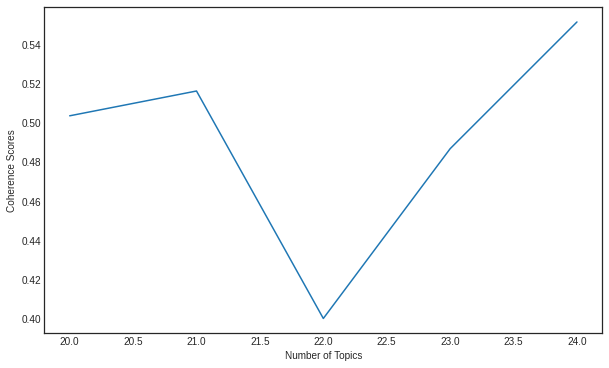

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize = (10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [ ]:
lsi_model = LsiModel(corpus, num_topics = 24, id2word = dictionary)
topics = lsi_model.print_topics(num_topics = 24)
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '-0.381*"file" + -0.193*"program" + -0.169*"edu" + -0.162*"imag" + -0.130*"avail" + -0.126*"output" + -0.119*"includ" + -0.115*"inform" + -0.101*"pub" + -0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.12

### 잠재 디리클레 할당을 위한 `LdaModel`

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics = 20, id2word = dictionary)
topics = lda_model.print_topics()
topics

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.141*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.007*"satellit" + 0.004*"launch" + 0.003*"space" + 0.003*"orbit" + 0.002*"nord" + 0.002*"breaker" + 0.002*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.001*"crowlei" + 0.001*"neuron"'),
 (1,
  '0.008*"health" + 0.007*"peopl" + 0.006*"like" + 0.005*"time" + 0.005*"juda" + 0.005*"year" + 0.005*"know" + 0.005*"word" + 0.004*"dont" + 0.004*"work"'),
 (2,
  '0.010*"space" + 0.006*"like" + 0.004*"year" + 0.004*"good" + 0.004*"point" + 0.004*"model" + 0.004*"launch" + 0.004*"think" + 0.003*"orbit" + 0.003*"thing"'),
 (3,
  '0.010*"keyboard" + 0.006*"mous" + 0.006*"time" + 0.006*"problem" + 0.006*"good" + 0.006*"memori" + 0.005*"work" + 0.005*"know" + 0.005*"need" + 0.004*"thank"'),
 (4,
  '0.008*"scsi" + 0.005*"ship" + 0.004*"cipher" + 0.004*"control" + 0.004*"printer" + 0.004*"condit" + 0.004*"offer" + 0.003*"zionism" + 0.003*"like" + 0.003*"need"'),
 (5,
  '0.008*"like" + 0.008*"time" + 0.008*"work" + 0.007*"problem" + 0.006*"need" + 0.006*"encrypt

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics = num_topics, id2word = dictionary)
    coherence = CoherenceModel(model = model,
                               texts = news_texts,
                               dictionary = dictionary)
    coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

[0.46922055699821935, 0.5406389755913833, 0.4883652727203298, 0.48014089192707327, 0.499314922974361]


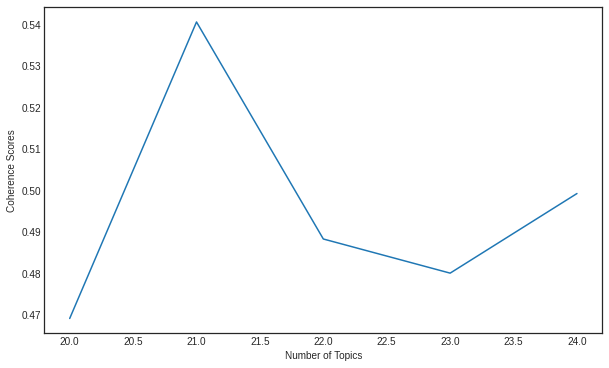

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize = (10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [32]:
from numpy import sum
lda_model = LdaModel(corpus, num_topics = 21, id2word = dictionary)
topics = lda_model.print_topics(num_topics = 21)
topics

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.012*"peopl" + 0.009*"jesu" + 0.007*"know" + 0.007*"said" + 0.006*"armenian" + 0.006*"like" + 0.006*"christian" + 0.005*"think" + 0.005*"come" + 0.005*"word"'),
 (1,
  '0.019*"file" + 0.013*"char" + 0.012*"contest" + 0.010*"onam" + 0.009*"entri" + 0.007*"line" + 0.007*"program" + 0.006*"return" + 0.006*"section" + 0.006*"filenam"'),
 (2,
  '0.009*"peopl" + 0.007*"israel" + 0.007*"christian" + 0.006*"state" + 0.006*"jew" + 0.005*"believ" + 0.005*"isra" + 0.005*"right" + 0.005*"exist" + 0.004*"muslim"'),
 (3,
  '0.014*"think" + 0.013*"know" + 0.013*"dont" + 0.010*"believ" + 0.007*"mean" + 0.007*"like" + 0.006*"thing" + 0.005*"hell" + 0.005*"absolut" + 0.004*"truth"'),
 (4,
  '0.005*"yanke" + 0.005*"byte" + 0.005*"neutral" + 0.004*"power" + 0.004*"german" + 0.003*"astro" + 0.003*"drive" + 0.003*"jewish" + 0.003*"athen" + 0.003*"plai"'),
 (5,
  '0.031*"drive" + 0.012*"disk" + 0.008*"hard" + 0.008*"work" + 0.008*"scsi" + 0.007*"control" + 0.006*"card" + 0.006*"time" + 0.006*"floppi

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
